In [35]:
import pandas as pd
import glob
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np

path = r'../data/curated/merged_dataset/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

merged_df = pd.concat(li, axis=0, ignore_index=True)
merged_df.drop(['address', 'latitude', 'longitude', 'postcode', 'sa2_2016'], axis=1, inplace=True)
print(merged_df.columns)
merged_df


Index(['year', 'sa2_2021', 'residence_type', 'nbed', 'nbath', 'ncar',
       'min_distance_to_cbd', 'min_distance_to_park', 'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp', 'min_distance_to_poli', 'min_distance_to_shop',
       'weekly_rent', 'gdp(USD Millioins)', 'saving_rate(% of GDP)',
       'income_per_person', 'population_density', 'crime_cases'],
      dtype='object')


,year,sa2_2021,residence_type,nbed,nbath,ncar,min_distance_to_cbd,min_distance_to_park,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_poli,min_distance_to_shop,weekly_rent,gdp(USD Millioins),saving_rate(% of GDP),income_per_person,population_density,crime_cases
0,2013,204011057,House,2.0,1.0,0,227.97163,23.16035,7.35747,16.96507,35.56825,21.35025,22.04660,9.35209,300.0,1536454,6.861393,39683.563449,2.172408,86.0
1,2013,205051101,House,2.0,1.0,0,223.66084,5.71742,6.50536,6.76794,7.54355,7.42972,6.28177,9.35209,215.0,1536454,6.861393,47222.702327,5.425503,36.0
2,2013,204011057,House,2.0,1.0,0,243.25680,5.11222,0.20027,36.72106,50.85341,36.63541,0.08478,9.35209,175.0,1536454,6.861393,39683.563449,2.172408,86.0
3,2013,202011022,House,4.0,2.0,0,140.35827,78.32509,10.66523,11.91899,11.26906,177.44731,84.47341,9.35209,350.0,1536454,6.861393,43556.283562,473.765281,1288.0
4,2013,208041195,Apartment,1.0,1.0,0,13.86135,0.93250,1.32931,3.49174,2.20800,177.44731,84.47341,3.96501,275.0,1536454,6.861393,86103.411528,2834.210526,1923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172030,2022,205021086,House,3.0,1.0,1,293.28053,0.56012,1.21809,114.77016,90.08591,140.56888,74.35608,13.64920,265.0,3305754,12.839000,54365.266130,402.000000,281.0
172031,2022,217041479,House,3.0,2.0,2,258.29111,3.49087,5.08707,3.60570,8.37185,2.60312,74.35608,13.64920,500.0,3305754,12.839000,60828.473189,689.000000,3049.0
172032,2022,208021177,House,2.0,2.0,1,9.47077,2.45011,1.33931,1.62322,3.63291,140.56888,74.35608,1.97636,750.0,3305754,12.839000,98756.492866,3656.000000,759.0
172033,2022,206041506,Apartment,1.0,1.0,1,1.84933,0.65199,1.10438,1.27940,1.87840,140.56888,74.35608,13.64920,409.0,3305754,12.839000,71305.473808,5791.000000,1788.0


In [36]:
for col in merged_df.columns:
    if col not in ['residence_type', 'year']:
        merged_df[col] = merged_df[col].astype(float)
merged_df['year'] = merged_df['year'].astype(int)
#pd.get_dummies(merged_df['sa2_2021'])
merged_df.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)
merged_df['residence_type'] = merged_df['residence_type'].astype('category')
merged_df['residence_type'] = merged_df['residence_type'].cat.codes
merged_df.dropna(inplace=True)

y = np.log(merged_df['weekly_rent'])
#merged_df.drop(['weekly_rent', 'year'], axis=1, inplace=True)
merged_df.drop('weekly_rent', axis=1, inplace=True)
X = merged_df

print(X)
print(X.dtypes)


        year     sa2_2021  residence_type  nbed  nbath  ncar  \
0       2013  204011057.0               1   2.0    1.0   0.0   
1       2013  205051101.0               1   2.0    1.0   0.0   
2       2013  204011057.0               1   2.0    1.0   0.0   
3       2013  202011022.0               1   4.0    2.0   0.0   
4       2013  208041195.0               0   1.0    1.0   0.0   
...      ...          ...             ...   ...    ...   ...   
172030  2022  205021086.0               1   3.0    1.0   1.0   
172031  2022  217041479.0               1   3.0    2.0   2.0   
172032  2022  208021177.0               1   2.0    2.0   1.0   
172033  2022  206041506.0               0   1.0    1.0   1.0   
172034  2022  206071139.0               0   1.0    1.0   1.0   

        min_distance_to_cbd  min_distance_to_park  min_distance_to_prim  \
0                 227.97163              23.16035               7.35747   
1                 223.66084               5.71742               6.50536   
2     

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state= None, shuffle= False)
sel = RandomForestRegressor(n_estimators = 100)
sel.fit(X_train, y_train)

# Get the names of features selected
sel.feature_importances_

array([0.01216362, 0.03210129, 0.00591063, 0.08466753, 0.14389193,
       0.01887556, 0.14587415, 0.04075303, 0.04570663, 0.03310095,
       0.02931965, 0.01704126, 0.02612171, 0.00957941, 0.01271886,
       0.00909117, 0.26495084, 0.04117781, 0.02695399])

{'year': 0.012163616133798192, 'sa2_2021': 0.03210128580518713, 'residence_type': 0.0059106295732685565, 'nbed': 0.08466752776095998, 'nbath': 0.14389192570517934, 'ncar': 0.0188755557745793, 'min_distance_to_cbd': 0.14587415029693834, 'min_distance_to_park': 0.04075302889389927, 'min_distance_to_prim': 0.04570662747731826, 'min_distance_to_second': 0.03310094611480094, 'min_distance_to_train': 0.029319654545748274, 'min_distance_to_hosp': 0.01704126327429442, 'min_distance_to_poli': 0.026121711828460063, 'min_distance_to_shop': 0.009579406286820186, 'gdp': 0.01271886270325342, 'saving_rate': 0.009091165885802924, 'income_per_person': 0.2649508395716851, 'population_density': 0.04117780855664918, 'crime_cases': 0.026953993811357196}
[('residence_type', 0.0059106295732685565), ('saving_rate', 0.009091165885802924), ('min_distance_to_shop', 0.009579406286820186), ('year', 0.012163616133798192), ('gdp', 0.01271886270325342), ('min_distance_to_hosp', 0.01704126327429442), ('ncar', 0.018875

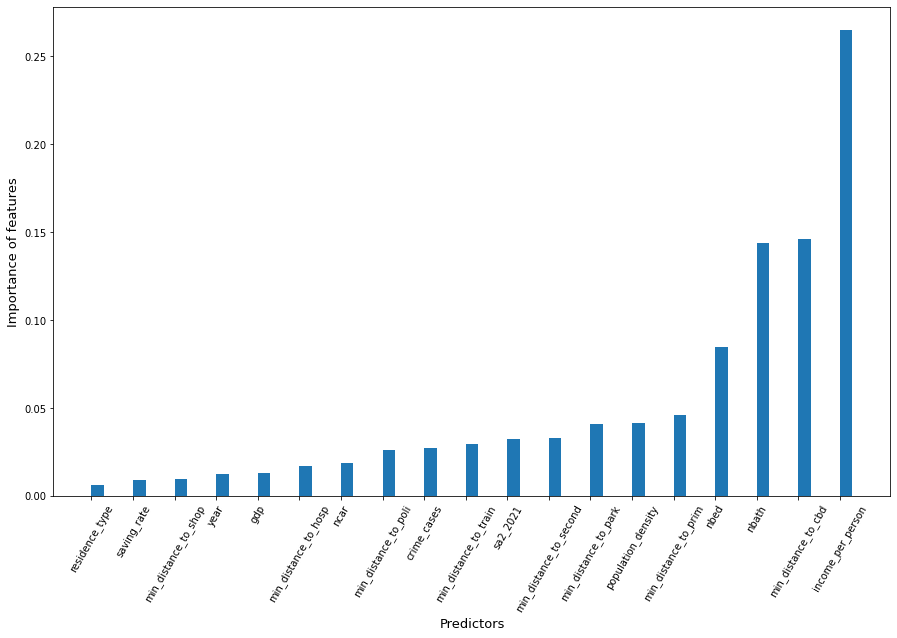

In [38]:
import matplotlib.pyplot as plt
dict = {}
for i in range(len(X.columns)):
    dict[X.columns[i]] = sel.feature_importances_[i]

print(dict)
sorted_dict = sorted(dict.items(), key=lambda x:x[1])
print(sorted_dict)

keys = []
vals = []
for i in sorted_dict:
    keys.append(i[0])
    vals.append(i[1])

print(keys, vals)


plt.figure(figsize=(15, 9))  # width:20, height:3

plt.bar(keys, vals, align='edge', width=0.3)
plt.xticks(rotation=60)
plt.ylabel("Importance of features", fontsize = 13)
plt.xlabel("Predictors", fontsize = 13)
plt.show()

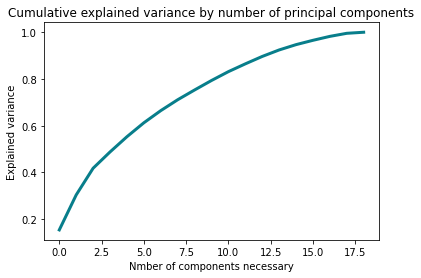

In [39]:
# Scrutinize the data with PCA: Test the attribute relevance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components')
plt.xlabel("Nmber of components necessary")
plt.ylabel("Explained variance")
plt.show()

In [40]:
# Check the accuracy before predicting with the trained random forest regressor
prediction = sel.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

# Calculate the absolute errors
errors = abs(prediction - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#print(X_test)
#print(list(zip(y_test, prediction)))

0.055335577016879404
0.235235152596034


TypeError: Invalid argument, not a string or column: 120427    0.456145
120428    0.073156
120429   -0.272006
120430    0.273448
120431   -0.048641
            ...   
172030    0.269654
172031   -0.011937
172032   -0.090785
172033   -0.070392
172034    0.358706
Name: weekly_rent, Length: 51606, dtype: float64 of type <class 'pandas.core.series.Series'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

In [ ]:
# Make a new folder for random forest preiction for rental price
import os
  
# Directory
directory = "random_forest_pred"
  
# Parent Directory path
parent_dir = "../data/curated/"

# Path
path = os.path.join(parent_dir, directory)

# Create the directory
os.mkdir(path)

In [ ]:
# Train with the whole dataset for the actual prediction for the next 5 years (This training is not for feature enginnering & accuracy test)
sel_pred = RandomForestRegressor(n_estimators = 100)
sel_pred.fit(X, y)

In [33]:
# Predict for the next 5 years
import os
import re
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
from pyspark.sql.functions import lit

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

parent_dir = "../data/curated/2023_2027_data"

for filename in os.listdir(parent_dir):
    merged_df_yr = spark.read.csv(parent_dir + "/" + filename, header=True)

    # Extract year from the file name 
    which_year = re.findall(r'\d+', filename)

    # Add year column to the dataset to fit the input into the model
    merged_df_yr = merged_df_yr.withColumn("year", lit(which_year[0]))

    for c in merged_df_yr.columns:
        merged_df_yr = merged_df_yr.withColumn(c,merged_df_yr[c].cast(IntegerType())) 

    merged_df_yr = merged_df_yr.toPandas()
    merged_df_yr.rename(columns = {'gdp(USD Millioins)':'gdp', 'saving_rate(% of GDP)':'saving_rate'}, inplace = True)
    merged_df_yr['residence_type'] = merged_df_yr['residence_type'].astype('category')
    merged_df_yr['residence_type'] = merged_df_yr['residence_type'].cat.codes
    merged_df_yr.dropna(inplace=True)
    
    # Predict with random forest tree
    prediction = sel_pred.predict(merged_df_yr)

    new_csv_name = "../data/curated/random_forest_pred/" + filename

    np.savetxt(new_csv_name, prediction, delimiter=",")

        nbed  nbath  ncar   sa2_2021  year      gdp  saving_rate  \
0          1      1     0  201011001  2023  3567759           13   
1          1      1     0  201011001  2023  3567759           13   
2          1      1     1  201011001  2023  3567759           13   
3          1      1     1  201011001  2023  3567759           13   
4          2      1     0  201011001  2023  3567759           13   
...      ...    ...   ...        ...   ...      ...          ...   
146791     8      8     6  217041480  2023  3567759           13   
146792     8      8     7  217041480  2023  3567759           13   
146793     8      8     7  217041480  2023  3567759           13   
146794     8      8     8  217041480  2023  3567759           13   
146795     8      8     8  217041480  2023  3567759           13   

        income_per_person  population_density  crime_cases  residence_type  \
0                   68806                 630         7754              -1   
1                   68806  

/home/hyunjinp/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


        nbed  nbath  ncar   sa2_2021  year      gdp  saving_rate  \
0          1      1     0  201011001  2024  3850385           14   
1          1      1     0  201011001  2024  3850385           14   
2          1      1     1  201011001  2024  3850385           14   
3          1      1     1  201011001  2024  3850385           14   
4          2      1     0  201011001  2024  3850385           14   
...      ...    ...   ...        ...   ...      ...          ...   
146791     8      8     6  217041480  2024  3850385           14   
146792     8      8     7  217041480  2024  3850385           14   
146793     8      8     7  217041480  2024  3850385           14   
146794     8      8     8  217041480  2024  3850385           14   
146795     8      8     8  217041480  2024  3850385           14   

        income_per_person  population_density  crime_cases  residence_type  \
0                   70329                 664         7778              -1   
1                   70329  

/home/hyunjinp/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


        nbed  nbath  ncar   sa2_2021  year      gdp  saving_rate  \
0          1      1     0  201011001  2027  4838738           16   
1          1      1     0  201011001  2027  4838738           16   
2          1      1     1  201011001  2027  4838738           16   
3          1      1     1  201011001  2027  4838738           16   
4          2      1     0  201011001  2027  4838738           16   
...      ...    ...   ...        ...   ...      ...          ...   
146791     8      8     6  217041480  2027  4838738           16   
146792     8      8     7  217041480  2027  4838738           16   
146793     8      8     7  217041480  2027  4838738           16   
146794     8      8     8  217041480  2027  4838738           16   
146795     8      8     8  217041480  2027  4838738           16   

        income_per_person  population_density  crime_cases  residence_type  \
0                   74898                 768         7850              -1   
1                   74898  

/home/hyunjinp/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


        nbed  nbath  ncar   sa2_2021  year      gdp  saving_rate  \
0          1      1     0  201011001  2026  4484071           15   
1          1      1     0  201011001  2026  4484071           15   
2          1      1     1  201011001  2026  4484071           15   
3          1      1     1  201011001  2026  4484071           15   
4          2      1     0  201011001  2026  4484071           15   
...      ...    ...   ...        ...   ...      ...          ...   
146791     8      8     6  217041480  2026  4484071           15   
146792     8      8     7  217041480  2026  4484071           15   
146793     8      8     7  217041480  2026  4484071           15   
146794     8      8     8  217041480  2026  4484071           15   
146795     8      8     8  217041480  2026  4484071           15   

        income_per_person  population_density  crime_cases  residence_type  \
0                   73375                 733         7826              -1   
1                   73375  

/home/hyunjinp/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


        nbed  nbath  ncar   sa2_2021  year      gdp  saving_rate  \
0          1      1     0  201011001  2025  4155244           15   
1          1      1     0  201011001  2025  4155244           15   
2          1      1     1  201011001  2025  4155244           15   
3          1      1     1  201011001  2025  4155244           15   
4          2      1     0  201011001  2025  4155244           15   
...      ...    ...   ...        ...   ...      ...          ...   
146791     8      8     6  217041480  2025  4155244           15   
146792     8      8     7  217041480  2025  4155244           15   
146793     8      8     7  217041480  2025  4155244           15   
146794     8      8     8  217041480  2025  4155244           15   
146795     8      8     8  217041480  2025  4155244           15   

        income_per_person  population_density  crime_cases  residence_type  \
0                   71852                 699         7802              -1   
1                   71852  

/home/hyunjinp/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
